In [7]:
import numpy as np
import pandas as pd
import pystan

In [8]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(2019)
arma_process = ArmaProcess(np.array([1,-0.85]),np.array([1]))
ar1_data = arma_process.generate_sample(nsample=50)
ar1_data

array([-0.21767896,  0.63642824,  2.02224181,  3.05076958,  2.23128877,
        2.58220429,  2.76863507,  2.64106748,  2.00927309,  2.66137237,
        0.57254122,  0.14171733,  0.13736462, -0.39822359, -0.09398076,
       -0.26919625,  2.4433556 ,  2.54165475,  3.00633698,  2.05184485,
        0.7807326 ,  0.72859134, -2.5857376 , -1.14290753, -0.16419471,
        0.33457505,  0.69531704,  1.07770875,  0.38052273, -0.51546362,
       -1.2505189 , -1.51373401, -0.21587255,  0.03392948, -1.14701853,
       -1.90108254, -2.60986782, -1.63158134, -0.3230309 , -0.0368354 ,
       -0.80636665, -1.6645156 , -2.9642012 , -3.72639926, -2.72243114,
       -2.48715268, -0.62513259, -1.32388319,  0.71369639,  0.1672798 ])

In [9]:
stan_code = """
data {
  int<lower=0> N;
  vector[N] y;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  alpha ~ normal(0,1);
  beta ~ normal(0.5,0.5);
  for (n in 2:N)
    y[n] ~ normal(alpha + beta * y[n-1], sigma);
}
"""

In [10]:
stan_data = {"N":len(ar1_data),"y":list(ar1_data)}
stan_model = pystan.StanModel(model_code=stan_code)
fit = stan_model.sampling(data=stan_data, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c8eb55ea5d3093f9accdad80ba808426 NOW.


Inference for Stan model: anon_model_c8eb55ea5d3093f9accdad80ba808426.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   0.02  4.0e-3   0.14  -0.27  -0.07   0.02   0.13    0.3   1321    1.0
beta     0.8  2.0e-3   0.09   0.63   0.74    0.8   0.86   0.96   1822    1.0
sigma   1.07  2.7e-3   0.12   0.87   0.99   1.06   1.15   1.32   1833    1.0
lp__  -27.38    0.04    1.2 -30.38 -27.95 -27.08  -26.5  -26.0    823    1.0

Samples were drawn using NUTS at Tue Jul 30 18:57:07 2019.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


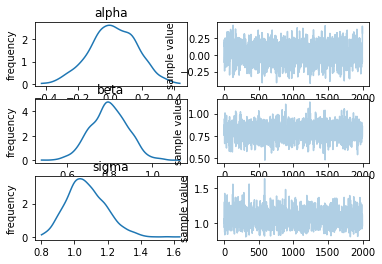

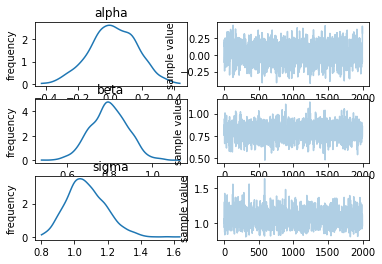

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import arviz
print(fit)
fit.plot()

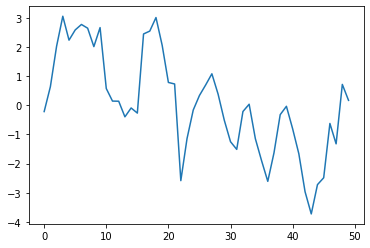

In [12]:
plt.plot(ar1_data)